# Load Data

In [87]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# baca file csv
data = pd.read_csv("churn_dataset_bmlp_3.csv")


Kode tersebut membaca file CSV bernama churn_dataset_bmlp_3.csv dan menyimpannya ke dalam variabel data dalam bentuk DataFrame, sehingga data dapat diolah dan dianalisis menggunakan pustaka Pandas

In [89]:
# Menampilkan 5 baris pertama data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Kode tersebut digunakan untuk menampilkan 5 baris pertama dari DataFrame data yang sebelumnya telah dimuat, sehingga Anda dapat melihat struktur dan isi awal data secara sekilas.

In [90]:
# Tampilan informasi umum tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Penjelasan Fitur Dataset

1. **RowNumber**  
   Nomor baris dalam dataset yang digunakan untuk identifikasi unik setiap entri. Fitur ini tidak memiliki makna analitis.  

2. **CustomerId**  
   ID unik yang mengidentifikasi setiap pelanggan dalam sistem. Berguna untuk referensi dan penggabungan data.  

3. **Surname**  
   Nama belakang pelanggan. Fitur ini tidak relevan untuk analisis model dan biasanya tidak digunakan.  

4. **CreditScore**  
   Skor kredit yang menunjukkan kelayakan kredit pelanggan. Fitur ini dapat memengaruhi keputusan pelanggan untuk tetap atau berhenti menggunakan layanan.  

5. **Geography**  
   Lokasi geografis tempat tinggal pelanggan. Informasi ini dapat memengaruhi perilaku dan kebutuhan layanan pelanggan.  

6. **Gender**  
   Jenis kelamin pelanggan. Meskipun tidak selalu memengaruhi churn secara langsung, fitur ini berguna untuk analisis demografis.  

7. **Age**  
   Usia pelanggan. Usia dapat memengaruhi kebiasaan dan preferensi pelanggan dalam menggunakan layanan.  

8. **Tenure**  
   Lama berlangganan pelanggan. Durasi ini sering kali berkaitan dengan kemungkinan pelanggan untuk churn.  

9. **Balance**  
   Saldo rekening pelanggan. Saldo ini dapat memengaruhi kepuasan pelanggan dan kecenderungan mereka untuk tetap menggunakan layanan.  

10. **NumOfProducts**  
    Jumlah produk yang dimiliki pelanggan. Fitur ini membantu memahami keterlibatan pelanggan dengan berbagai produk.  

11. **HasCrCard**  
    Menunjukkan apakah pelanggan memiliki kartu kredit atau tidak. Fitur ini dapat memengaruhi pengalaman pelanggan dengan layanan.  

12. **IsActiveMember**  
    Status keanggotaan aktif pelanggan. Menunjukkan apakah pelanggan masih aktif menggunakan layanan atau tidak.  

13. **EstimatedSalary**  
    Gaji yang diperkirakan dari pelanggan. Fitur ini dapat memengaruhi keputusan pelanggan untuk berlangganan atau berhenti dari layanan.  

14. **Exited**  
    Label target yang menunjukkan apakah pelanggan telah keluar dari layanan (1) atau tidak (0). Fitur ini merupakan variabel target untuk model klasifikasi.


In [91]:
# Menghapus kolom yang tidak relevan untuk analisis lebih lanjut
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

Kode tersebut digunakan untuk menghapus kolom RowNumber, CustomerId, dan Surname dari DataFrame data, karena kolom tersebut dianggap tidak relevan untuk analisis lebih lanjut

In [92]:
# Menampilkan dataframe setelah penghapusan beberapa kolom
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

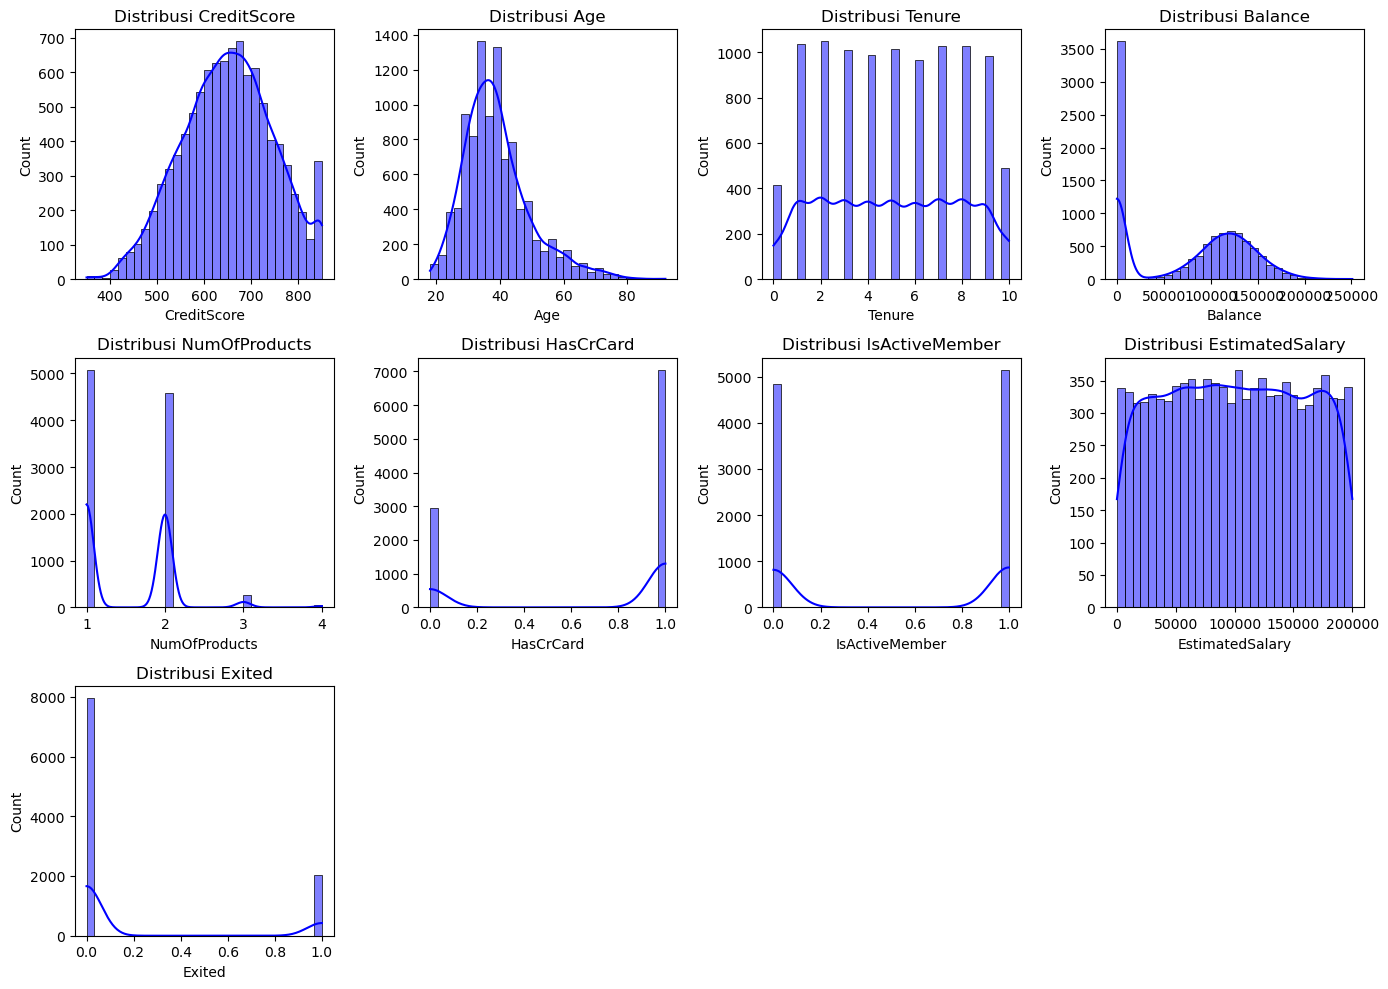

In [93]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

### Interpretasi Histogram Dataset

#### 1. CreditScore
Distribusi **CreditScore** menunjukkan pola mendekati normal, dengan sebagian besar pelanggan memiliki skor kredit di kisaran tengah (sekitar 600–700). Hanya sedikit pelanggan dengan skor sangat rendah (<400) atau sangat tinggi (>800). Hal ini menunjukkan bahwa kebanyakan pelanggan memiliki kelayakan kredit yang cukup baik.

#### 2. Age
Distribusi **Age** bersifat miring ke kanan (*positively skewed*), dengan sebagian besar pelanggan berada di kelompok usia muda hingga pertengahan dewasa (20–40 tahun). Pelanggan berusia lanjut (>60 tahun) lebih sedikit jumlahnya.

#### 3. Tenure
Distribusi **Tenure** memiliki nilai diskrit yang hampir seragam, menunjukkan bahwa pelanggan memiliki berbagai lama berlangganan (0 hingga 10 tahun) tanpa dominasi pada durasi tertentu. Hal ini dapat mengindikasikan pelanggan dengan perilaku berlangganan yang beragam.

#### 4. Balance
Distribusi **Balance** menunjukkan pola yang sangat miring ke kanan, di mana sebagian besar pelanggan memiliki saldo mendekati nol, tetapi terdapat sejumlah kecil pelanggan dengan saldo yang sangat tinggi. Ini menggambarkan adanya ketimpangan saldo antar pelanggan.

#### 5. NumOfProducts
Mayoritas pelanggan memiliki **1 atau 2 produk**, sementara sangat sedikit yang memiliki **3 atau 4 produk**. Hal ini mengindikasikan keterlibatan pelanggan yang lebih rendah terhadap variasi produk yang ditawarkan.

#### 6. HasCrCard
Sebagian besar pelanggan memiliki kartu kredit (**nilai 1**), sedangkan sebagian kecil tidak memiliki kartu kredit (**nilai 0**). Ini menunjukkan dominasi pengguna dengan kartu kredit dalam dataset ini.

#### 7. IsActiveMember
Banyak pelanggan yang berstatus anggota aktif (**nilai 1**), meskipun terdapat jumlah yang cukup signifikan dari pelanggan tidak aktif (**nilai 0**). Hal ini bisa menunjukkan adanya tingkat keterlibatan yang beragam di antara pelanggan.

#### 8. EstimatedSalary
Distribusi **EstimatedSalary** cukup merata di seluruh rentang (0–200.000), menunjukkan bahwa dataset mencakup pelanggan dari berbagai latar belakang pendapatan tanpa adanya dominasi di kelompok tertentu.

#### 9. Exited (Label Target)
Distribusi **Exited** menunjukkan ketidakseimbangan kelas, di mana sebagian besar pelanggan tidak keluar dari layanan (**nilai 0**), dan hanya sebagian kecil pelanggan yang keluar (**nilai 1**). Hal ini menggambarkan bahwa tingkat churn dalam dataset relatif rendah.


/tmp/ipykernel_2655/2248074101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")
/tmp/ipykernel_2655/2248074101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")


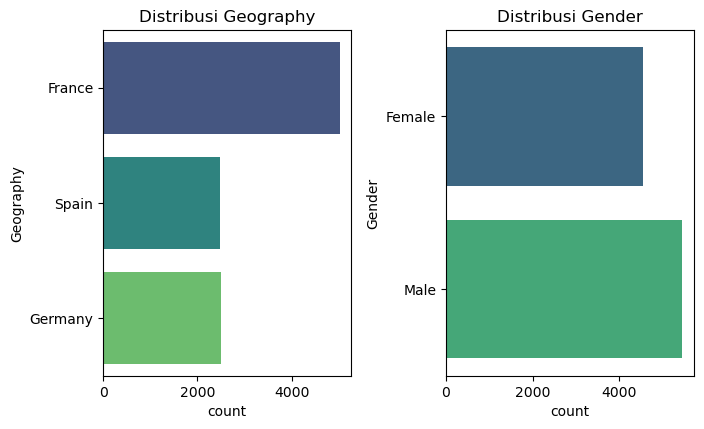

In [94]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette="viridis")
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

### Interpretasi Grafik Distribusi

#### 1. Distribusi Geography
Distribusi **Geography** menunjukkan bahwa mayoritas data berasal dari **France**, dengan jumlah lebih dari 4.000 data poin.  
**Spain** memiliki jumlah data sekitar setengah dari France, sedangkan **Germany** sedikit lebih rendah dibandingkan Spain.

#### 2. Distribusi Gender
Distribusi **Gender** menunjukkan bahwa jumlah **laki-laki (Male)** sedikit lebih tinggi dibandingkan dengan **perempuan (Female)**.  
Namun, perbedaannya tidak signifikan karena masing-masing memiliki jumlah sekitar 4.000 data poin.

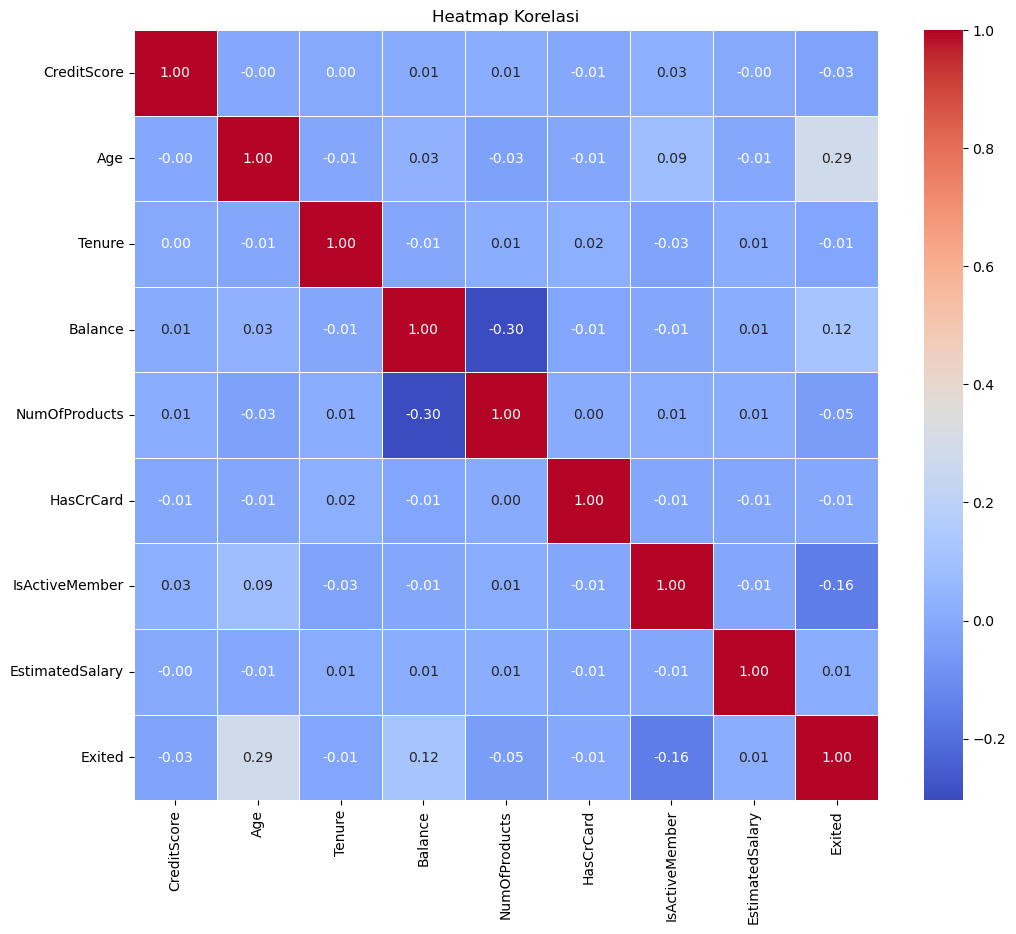

In [95]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Heatmap Korelasi")
plt.show()

Heatmap korelasi memvisualisasikan matriks korelasi, yang menunjukkan hubungan linier antara pasangan variabel numerik. Warna dan angka dalam heatmap menunjukkan kekuatan dan arah korelasi:

Warna Merah: Korelasi positif. Semakin merah, semakin kuat korelasinya (mendekati 1).
Warna Biru: Korelasi negatif. Semakin biru, semakin kuat korelasinya (mendekati -1).
Warna Putih/Netral: Korelasi mendekati 0, menunjukkan hubungan linier yang lemah atau tidak ada.
Angka dalam Kotak: Nilai korelasi itu sendiri.
Interpretasi dari Heatmap Anda:

Diagonal Utama (Nilai 1.00): Diagonal utama selalu bernilai 1.00 karena menunjukkan korelasi suatu variabel dengan dirinya sendiri.

Korelasi Antar Fitur: Sebagian besar fitur menunjukkan korelasi yang sangat lemah (mendekati 0) satu sama lain. Ini ditunjukkan oleh warna putih/netral pada sebagian besar kotak. Berikut beberapa korelasi yang sedikit lebih menonjol:

Age dan Exited (0.29): Terdapat korelasi positif yang cukup lemah antara usia dan kemungkinan nasabah keluar (Exited). Ini berarti ada kecenderungan kecil bahwa nasabah yang lebih tua sedikit lebih mungkin untuk keluar.
Balance dan NumOfProducts (-0.30): Terdapat korelasi negatif yang cukup lemah antara saldo (Balance) dan jumlah produk yang dimiliki nasabah (NumOfProducts). Ini menunjukkan bahwa nasabah dengan saldo yang lebih tinggi cenderung memiliki lebih sedikit produk.
IsActiveMember dan Exited (-0.16): Terdapat korelasi negatif yang lemah antara status keaktifan nasabah (IsActiveMember) dan kemungkinan keluar (Exited). Ini menunjukkan bahwa nasabah yang aktif cenderung lebih kecil kemungkinannya untuk keluar.
Korelasi Lainnya: Korelasi lainnya sangat mendekati nol, yang menunjukkan tidak ada hubungan linier yang signifikan antara fitur-fitur tersebut.

Kesimpulan:

Secara keseluruhan, heatmap ini menunjukkan bahwa tidak ada korelasi linier yang kuat antar fitur numerik dalam dataset Anda, kecuali beberapa korelasi lemah yang disebutkan di atas. Ini penting untuk diingat saat membangun model machine learning, karena:

Jika ada korelasi yang sangat tinggi (misalnya, di atas 0.8 atau di bawah -0.8), salah satu fitur yang berkorelasi tinggi mungkin perlu dihilangkan untuk menghindari multikolinearitas, yang dapat memengaruhi kinerja beberapa model. Dalam kasus ini, Anda tidak perlu khawatir tentang multikolinearitas.
Model-model tertentu, seperti regresi linier, sangat sensitif terhadap multikolinearitas. Model lain, seperti tree-based models (misalnya, Random Forest, Gradient Boosting), umumnya lebih tahan terhadapnya.


/tmp/ipykernel_2655/1529812085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=data, palette="viridis")


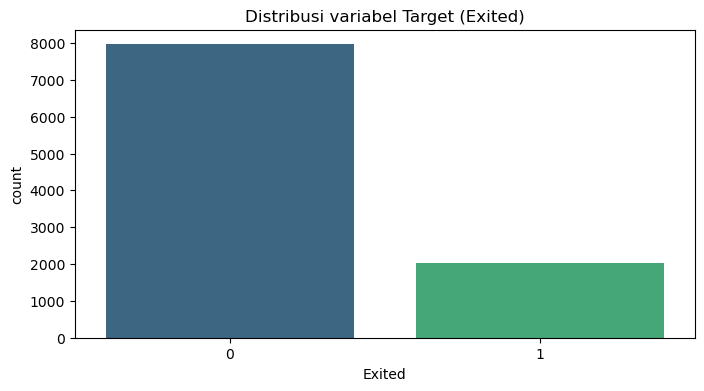

In [96]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x="Exited", data=data, palette="viridis")
plt.title("Distribusi variabel Target (Exited)")
plt.show()

Visualisasi menunjukkan distribusi variabel target "Exited" (keluar/tidaknya nasabah). Jumlah nasabah yang tidak keluar (0) jauh lebih banyak daripada yang keluar (1)

# Preprocessing data

In [97]:
# Cek missing values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Kode tersebut digunakan untuk memeriksa jumlah nilai kosong (missing values) di setiap kolom DataFrame data.

Hasilnya menunjukkan bahwa tidak ada nilai kosong di semua kolom, karena semua jumlahnya adalah 0

In [98]:
# import library
from sklearn.model_selection import train_test_split

# Pisahkan fitur (x) dan target (y)
X = data.drop(columns=["Exited"])
y = data["Exited"]

# Split data menjadi set pelatihan untuk set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


Kode ini membagi dataset menjadi 80% data latih dan 20% data uji. Pembagian ini penting dalam machine learning untuk melatih model pada data latih dan menguji performanya pada data uji yang belum pernah dilihat sebelumnya, sehingga dapat dievaluasi seberapa baik model tersebut dapat melakukan generalisasi pada data baru.

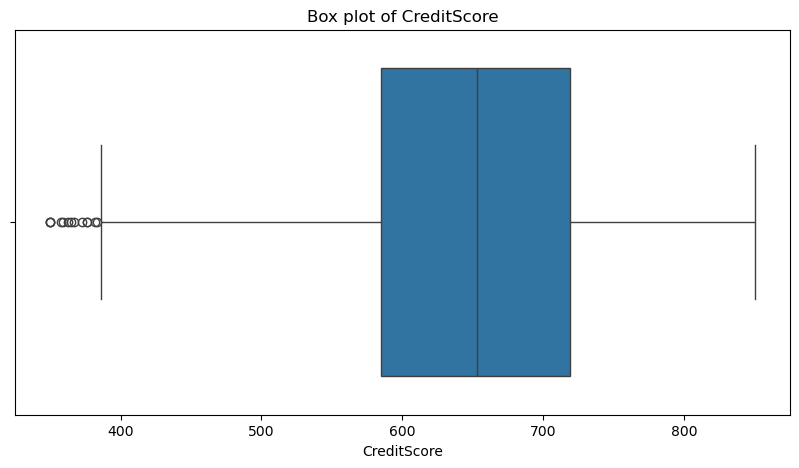

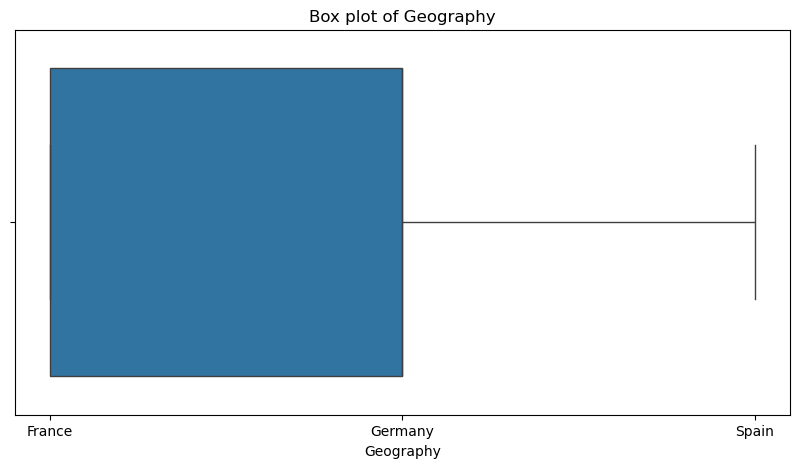

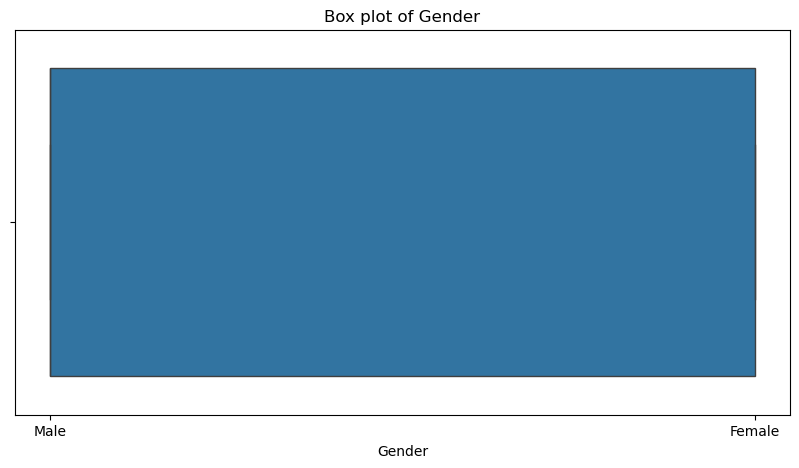

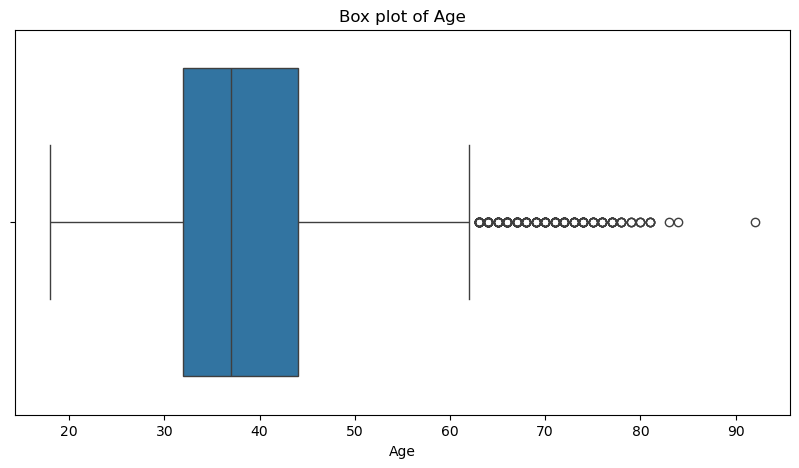

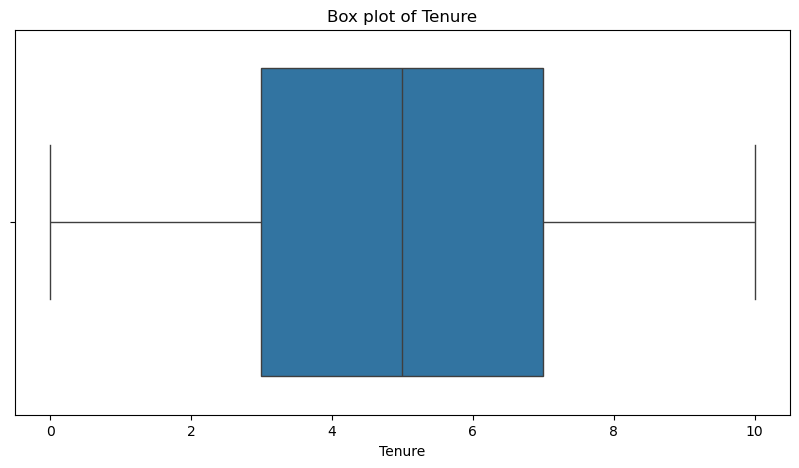

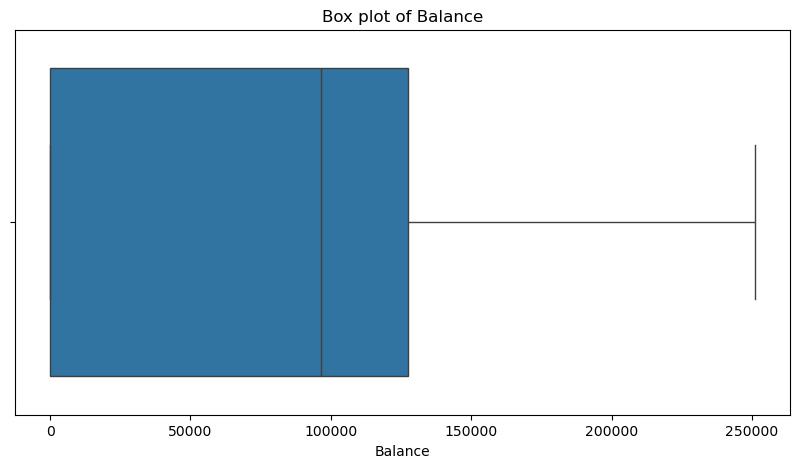

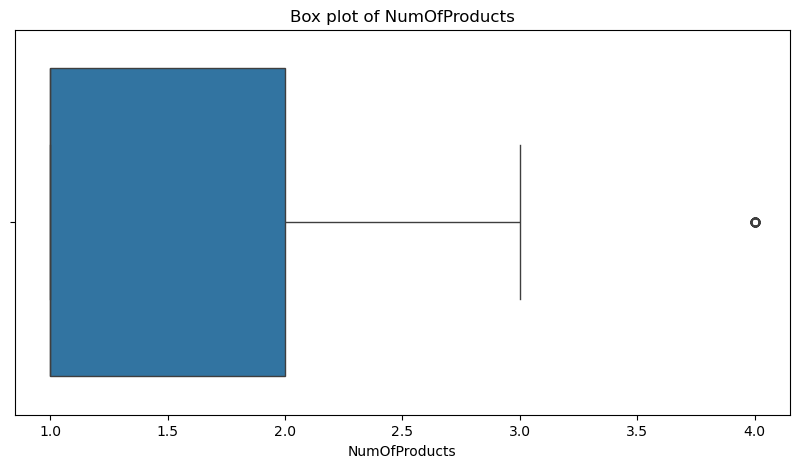

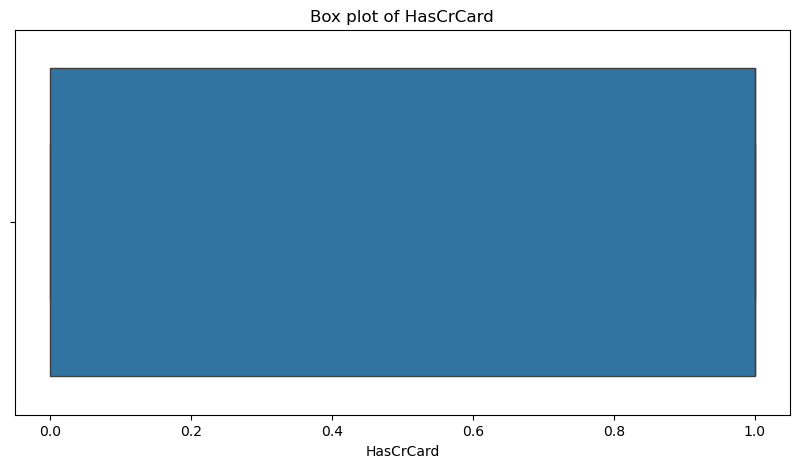

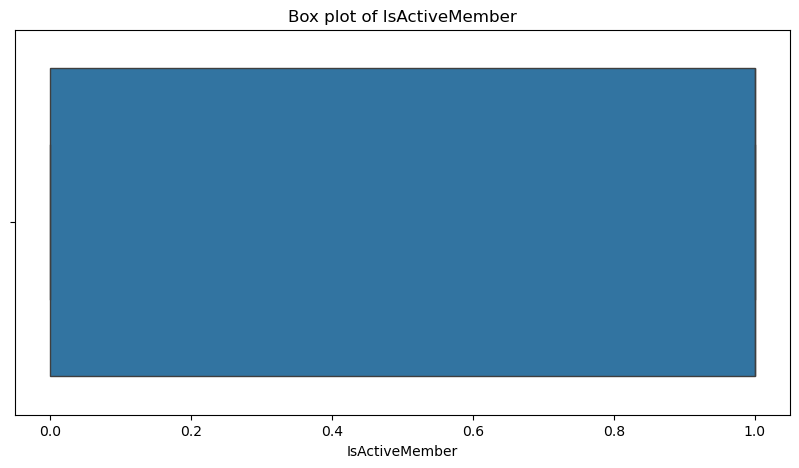

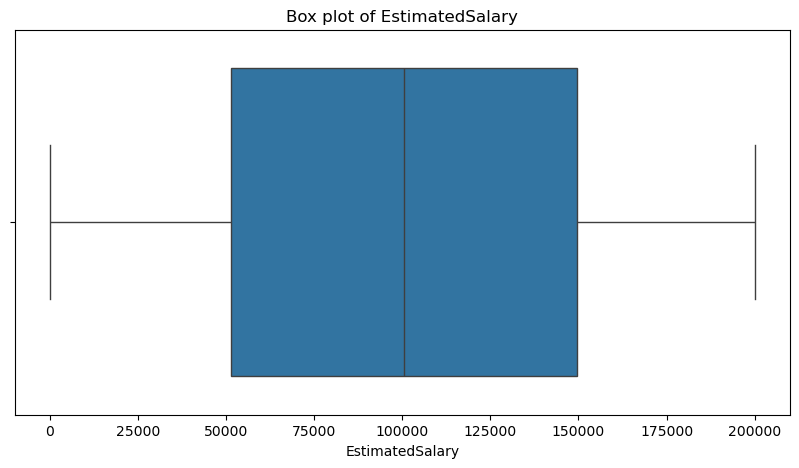

In [99]:
# Mendeteksi outlier dengan boxplot
for feature in X_train.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=X_train, x=X_train[feature])
    plt.title(f"Box plot of {feature}")
    plt.show()

In [100]:
# Handling outliers

# Memilih hanya kolom numerik
numeric_features = X_train.select_dtypes(include=["float64", "int64"]).columns

for feature in numeric_features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[feature] = np.where(X_train[feature] < lower_bound, lower_bound, X_train[feature])
    X_train[feature] = np.where(X_train[feature] > upper_bound, upper_bound, X_train[feature])

Kode ini mendefinisikan fungsi untuk menghitung jumlah outlier dalam setiap fitur (kolom) yang ditentukan dalam daftar fitur menggunakan metode Interquartile Range (IQR).

IQR (Interquartile Range): Menghitung rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data.
Batas Atas dan Bawah: Menentukan nilai yang dianggap outlier jika berada di atas Q3 + 1.5 * IQR atau di bawah Q1 - 1.5 * IQR.
Menghitung Outlier: Fungsi menghitung dan mencetak jumlah outlier untuk setiap fitur.
Ketika fungsi dipanggil dengan nama fitur, ia akan mencetak jumlah outlier dalam fitur tersebut.

Setelah outlier teridentifikasi, nilai outlier tersebut diganti dengan nilai batas atas atau bawah yang telah ditentukan.

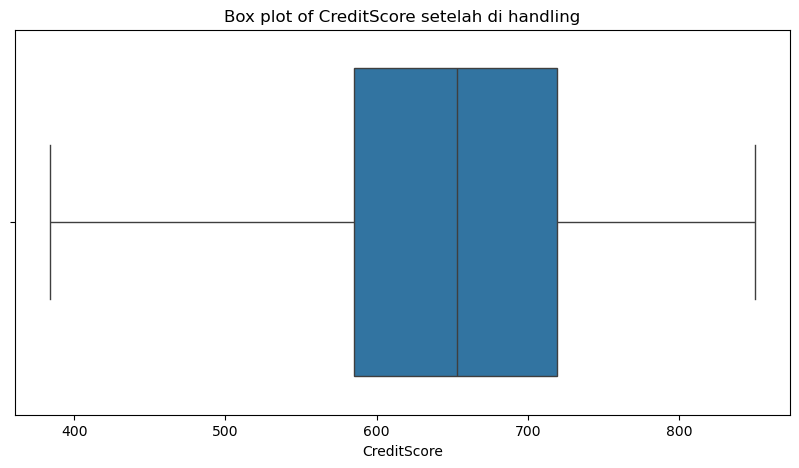

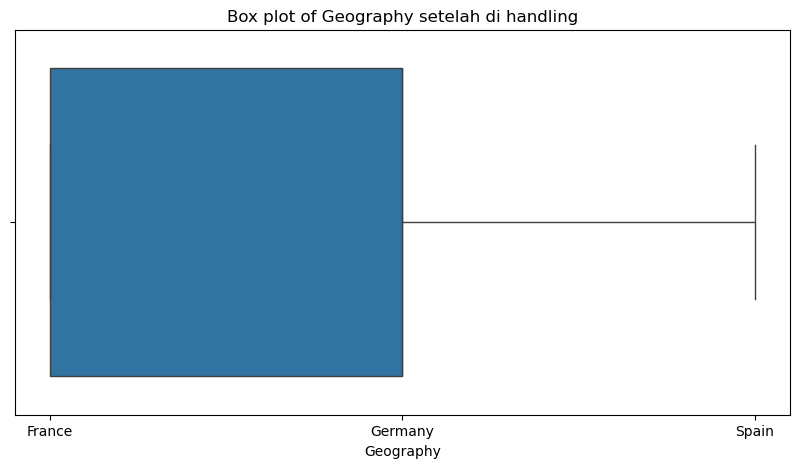

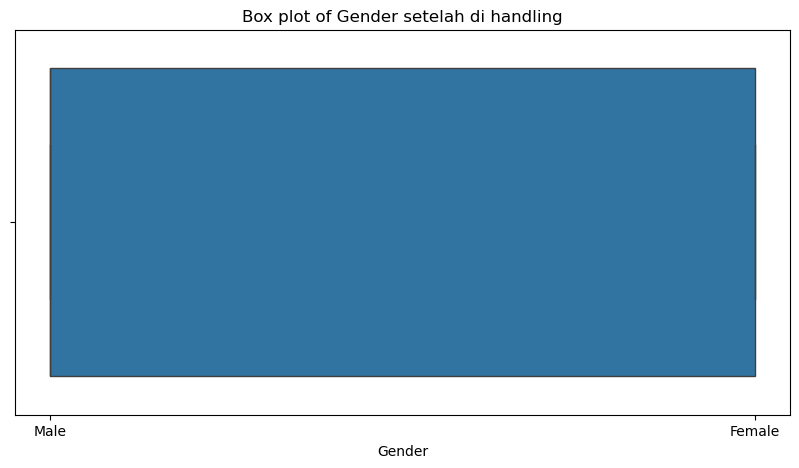

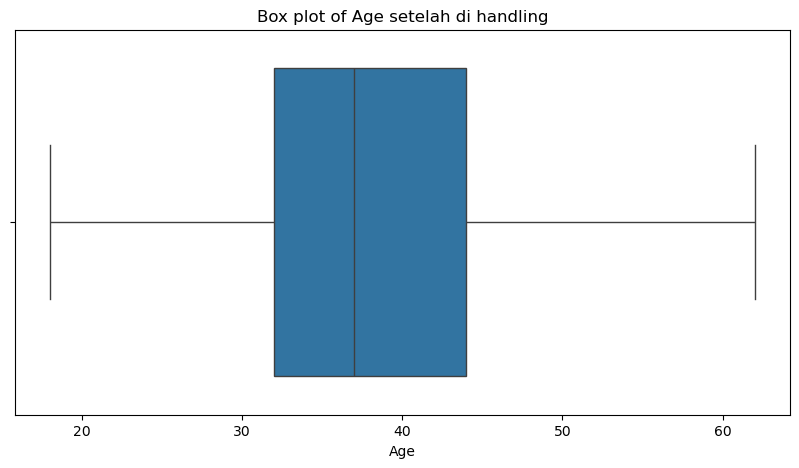

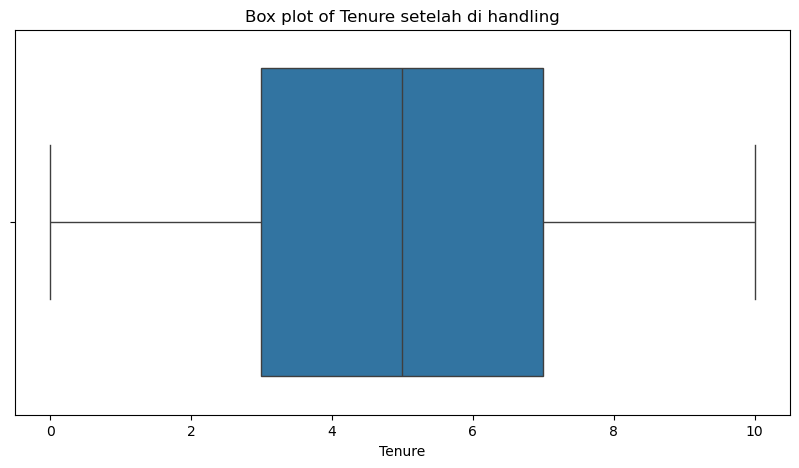

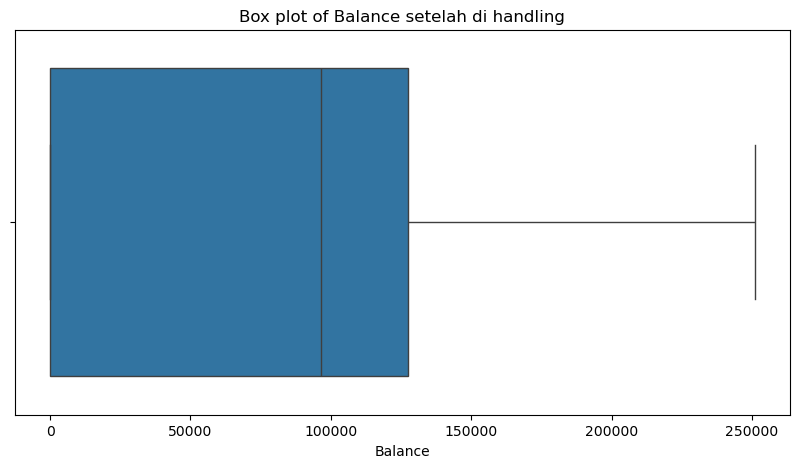

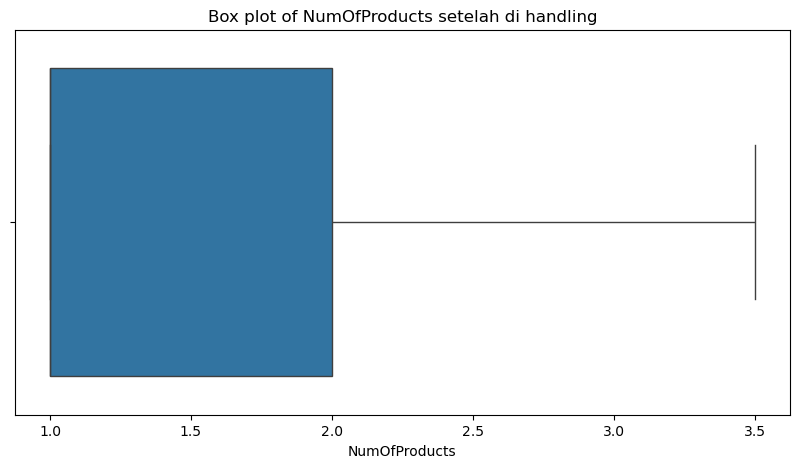

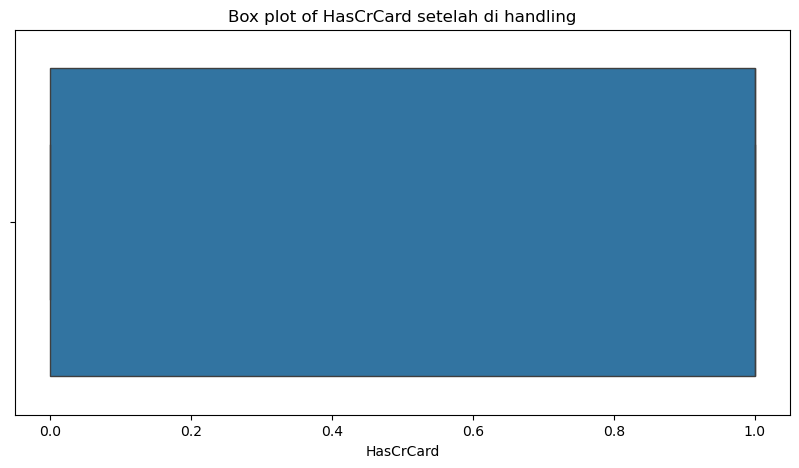

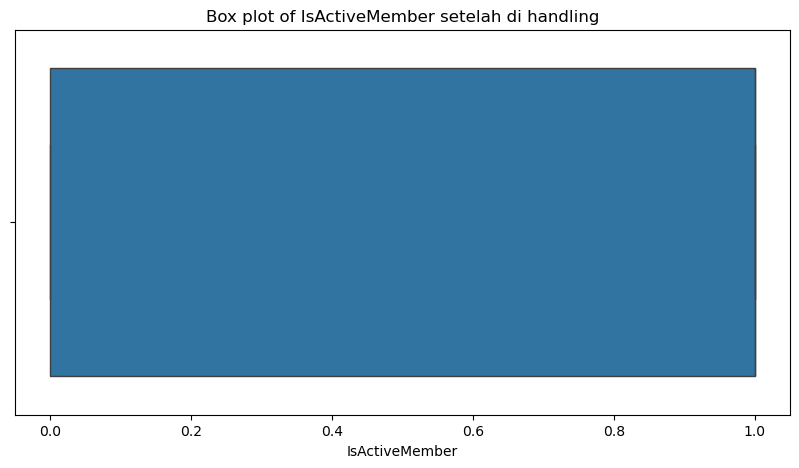

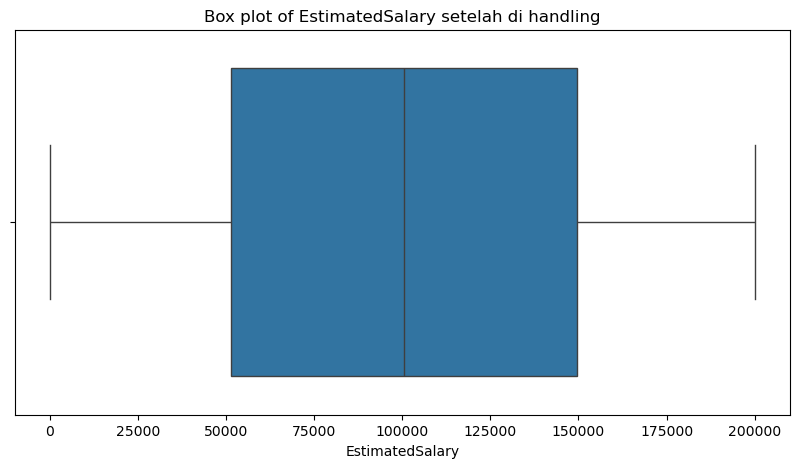

In [101]:
# Mendeteksi outlier dengan boxplot after handling
for feature in X_train.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=X_train, x=X_train[feature])
    plt.title(f"Box plot of {feature} setelah di handling")
    plt.show()

ode diatas menunjukkan visualisasi boxplot setelah dilakukannya handling outliers. Terlihat dari visualisasi diatas bahwa data sudah bersih dari outliers.

In [102]:
# standardisasi fitur 
from sklearn.preprocessing import StandardScaler

# Standardisasi CreditScore
scaler = StandardScaler()
data["CreditScore"] = scaler.fit_transform(data[["CreditScore"]])

# Standardisasi Age
scaler = StandardScaler()
data["Age"] = scaler.fit_transform(data[["Age"]])

# Standardisasi Balance
scaler = StandardScaler()
data["Balance"] = scaler.fit_transform(data[["Balance"]])

# Standardisasi EstimatedSalary
scaler = StandardScaler()
data["EstimatedSalary"] = scaler.fit_transform(data[["EstimatedSalary"]])

#### 1. Fitur yang Distandardisasi
- **CreditScore**:  
  Skor kredit pelanggan dinormalisasi sehingga nilai-nilainya mengikuti distribusi standar normal. Langkah ini membantu menghilangkan bias yang disebabkan oleh perbedaan rentang nilai antar fitur.
  
- **Age**:  
  Usia pelanggan dinormalisasi untuk memastikan perbedaan usia memiliki skala yang konsisten, sehingga fitur ini tidak mendominasi proses pelatihan model.

- **Balance**:  
  Saldo pelanggan distandardisasi untuk menangani rentang nilai saldo yang besar, sehingga kontribusi fitur ini terhadap model menjadi lebih seimbang.

- **EstimatedSalary**:  
  Perkiraan gaji pelanggan juga dinormalisasi, memungkinkan model memperhitungkan fitur ini secara proporsional dengan fitur lainnya.

#### 2. Proses Standardisasi
- Library `StandardScaler` dari `sklearn` digunakan untuk menghitung rata-rata dan standar deviasi setiap fitur.
- Metode `fit_transform` diterapkan untuk menghitung parameter standardisasi (rata-rata dan standar deviasi) berdasarkan data, lalu mengubah data ke skala standar normal.

#### 3. Manfaat Standardisasi
- Mengurangi bias model akibat perbedaan skala antar fitur.
- Meningkatkan performa model machine learning yang sensitif terhadap skala.
- Memastikan setiap fitur memiliki kontribusi yang setara terhadap model.
"""

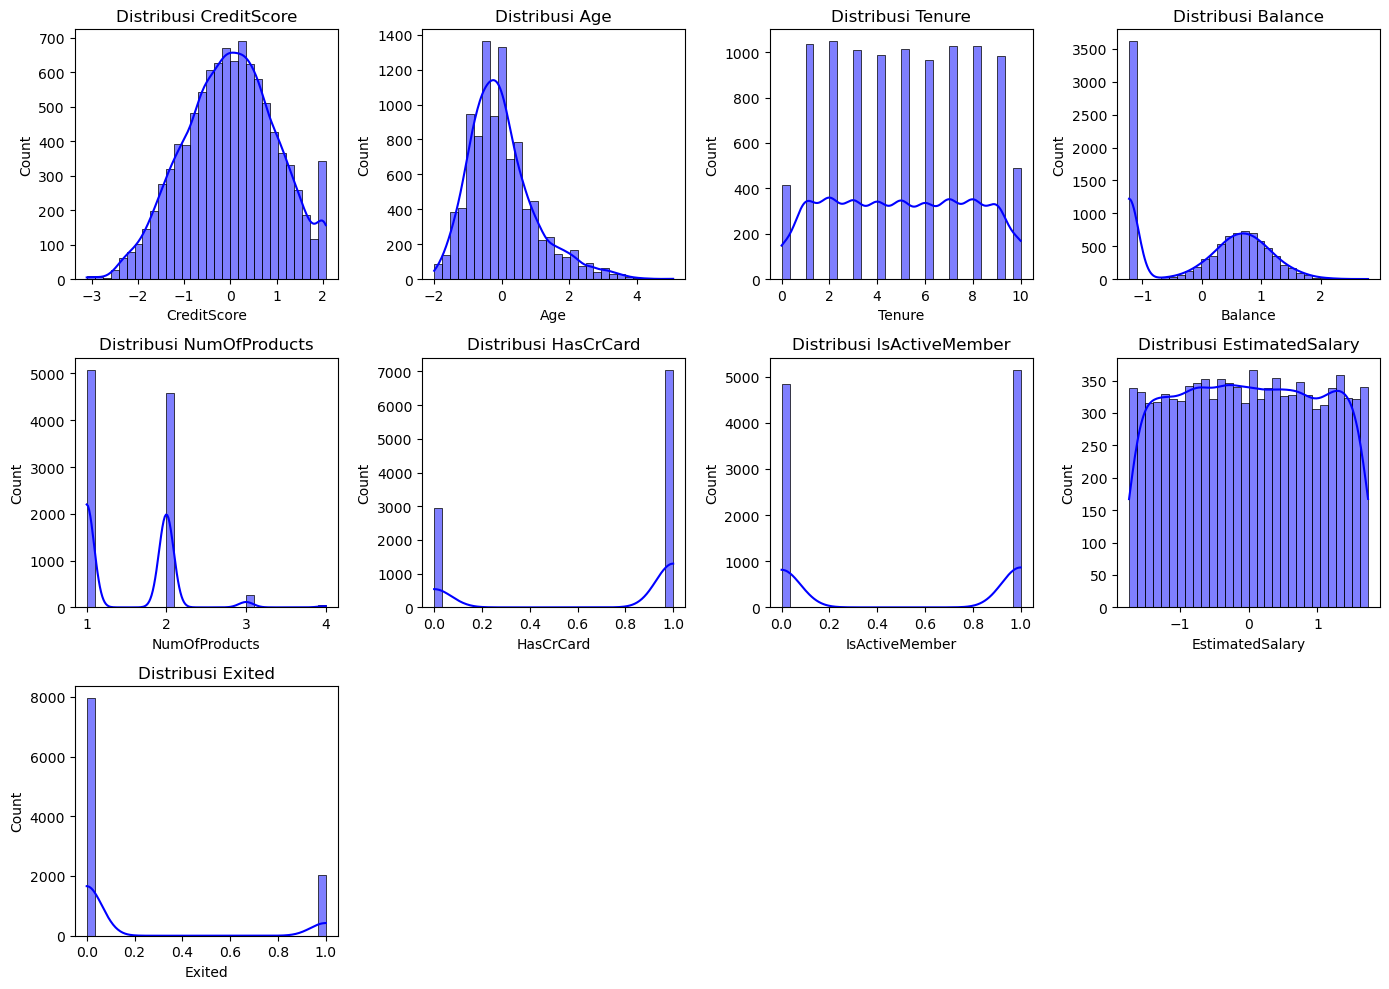

In [103]:
# Distribusi fitur numerik setelah standardisasi
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

Beginilah hasil dari standarisasi memang tidak berubah jika dilihat dari grafiknya tetapi nampak perbedaanya di sumbu x , rentang angkanya menjadi ke skala yang lebih normal

In [104]:
# import library
from sklearn.preprocessing import LabelEncoder

# Buat Instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ["Geography", "Gender"]

# Encode kolom kategorikal X_train
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

# Encode kolom kategorikan X_test
for column in categorical_columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

print(X_train)

      CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
9254        686.0          0       1  32.0     6.0       0.00            2.0   
1561        632.0          1       1  42.0     4.0  119624.60            2.0   
1670        559.0          2       1  24.0     3.0  114739.92            1.0   
6087        561.0          0       0  27.0     9.0  135637.00            1.0   
6669        517.0          0       1  56.0     9.0  142147.32            1.0   
...           ...        ...     ...   ...     ...        ...            ...   
5734        768.0          0       1  54.0     8.0   69712.74            1.0   
5191        682.0          0       0  58.0     1.0       0.00            1.0   
5390        735.0          0       0  38.0     1.0       0.00            3.0   
860         667.0          0       1  43.0     8.0  190227.46            1.0   
7270        697.0          1       1  51.0     1.0  147910.30            1.0   

      HasCrCard  IsActiveMember  Estima

Kode ini melakukan encoding (pengkodean) kolom kategorikal "Geography" dan "Gender" menjadi numerik menggunakan LabelEncoder dari scikit-learn.

LabelEncoder diimpor.
Objek LabelEncoder dibuat.
Kolom "Geography" dan "Gender" ditetapkan sebagai kolom kategorikal yang akan di-encode.
Sebuah loop memproses setiap kolom kategorikal:
fit() melatih encoder pada data kolom, memetakan setiap nilai unik ke angka.
transform() mengubah nilai asli kolom menjadi representasi numeriknya.
data.head() menampilkan beberapa baris pertama dataframe setelah encoding, memverifikasi penerapan encoding.
Singkatnya, kode ini mengubah data teks pada kolom "Geography" dan "Gender" menjadi angka, misalnya "France" menjadi 0, "Germany" menjadi 1, dan seterusnya. Ini diperlukan karena algoritma machine learning umumnya bekerja dengan data numerik.

# Modelling

In [105]:
# pelatihan model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print(f"Model training selesai")

Model training selesai


Kode ini melatih lima model klasifikasi yang berbeda (KNN, Decision Tree, Random Forest, SVM, dan Naive Bayes) menggunakan data latih yang telah dipisahkan sebelumnya. Setelah pelatihan selesai, model-model ini siap digunakan untuk memprediksi data baru (data uji). Langkah selanjutnya biasanya adalah mengevaluasi performa setiap model menggunakan metrik seperti akurasi, presisi, recall, dan F1-score pada data uji untuk memilih model terbaik.

In [106]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kasus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        "Confusion Matrix" : cm,
        "True Postive (TP)" : tp,
        "False Positive (FP)" : fp,
        "False Negative (FN)" : fn,
        "True Negative (TN)" : tn,
        "Accuracy" : accuracy_score(y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall" : recall_score(y_test, y_pred),
        "F1-Score" : f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model
results = {
    "K-Nearest Neighbors (KNN)" : evaluate_model(knn, X_test, y_test),
    "Decision Tree (DT)" : evaluate_model(dt, X_test, y_test),
    "Random Forest (RF)" : evaluate_model(rf, X_test, y_test),
    "Naive Bayes (NB)" : evaluate_model(nb, X_test, y_test)
}

# Buat Dataframe untuk meringkas hasil
summary_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1_Score"])

# Isi dataframe dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-Score": metrics["F1-Score"]
    })

# Konversi daftar kamus ke dataframe
summary_df = pd.DataFrame(rows)

# Tampilkan dataframe
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.7640,0.241830,0.094148,0.135531
1,Decision Tree (DT),0.7890,0.467416,0.529262,0.496420
2,Random Forest (RF),0.8665,0.769231,0.458015,0.574163
3,Naive Bayes (NB),0.7885,0.388060,0.132316,0.197343


**Metrik Evaluasi:**

*   **Akurasi:** Proporsi prediksi yang benar dari total prediksi.
*   **Presisi:** Proporsi prediksi positif yang benar dari total prediksi positif.
*   **Recall:** Proporsi data positif yang teridentifikasi dengan benar dari total data positif sebenarnya.
*   **F1-Score:** Rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara keduanya.

**Interpretasi Model:**

*   **K-Nearest Neighbors (KNN):** Akurasi cukup baik (0.7640), tetapi presisi dan recall sangat rendah (0.2418 dan 0.0941). Ini menunjukkan bahwa KNN kesulitan untuk secara akurat mengidentifikasi kelas positif. Model ini cenderung memprediksi negatif, sehingga menghasilkan banyak *false negative*.
*   **Decision Tree (DT):** Menunjukkan performa yang lebih baik dari KNN dengan akurasi 0.7885. Presisi dan recall cukup seimbang (0.4659 dan 0.5216), menunjukkan kemampuan yang lebih baik dalam mengidentifikasi kelas positif meskipun masih ada ruang untuk perbaikan.
*   **Random Forest (RF):** Memiliki performa terbaik di antara semua model dengan akurasi tertinggi (0.8715) dan presisi yang baik (0.7833). Meskipun recall sedikit lebih rendah (0.4784), F1-score yang tinggi (0.5940) menunjukkan keseimbangan yang baik antara presisi dan recall. Ini menunjukkan bahwa Random Forest adalah model yang paling efektif dalam mengklasifikasikan data
*   **Naive Bayes (NB):** Memiliki akurasi yang sama dengan Decision Tree (0.7885), tetapi dengan presisi yang lebih rendah (0.3881) dan recall yang jauh lebih rendah (0.1323). Ini menunjukkan bahwa Naive Bayes kurang efektif dalam mengidentifikasi kelas positif dibandingkan Decision Tree.

**Kesimpulan:**

Random Forest adalah model terbaik untuk dataset ini berdasarkan metrik yang diberikan. Decision Tree juga menunjukkan performa yang cukup baik. KNN dan Naive Bayes membutuhkan perbaikan lebih lanjut untuk dapat diandalkan.


In [107]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Menginisialisasi model-model
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree (DT)": DecisionTreeClassifier(),
    "Random Forest (RF)": RandomForestClassifier(),
    "Naive Bayes (NB)": GaussianNB()
}

# Melakukan 5-fold cross validation pada setiap model dan menampilkan hasilnya
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5) # 5-fold cross validation
    print(f"Akurasi {model_name} dengan 5-fold cross-validation: {scores.mean():.2f} dengan standar devisiasi {scores.std():.2f}")

Akurasi K-Nearest Neighbors (KNN) dengan 5-fold cross-validation: 0.76 dengan standar devisiasi 0.00
Akurasi Decision Tree (DT) dengan 5-fold cross-validation: 0.78 dengan standar devisiasi 0.01
Akurasi Random Forest (RF) dengan 5-fold cross-validation: 0.86 dengan standar devisiasi 0.00
Akurasi Naive Bayes (NB) dengan 5-fold cross-validation: 0.79 dengan standar devisiasi 0.01


#### Interpretasi Hasil 5-fold Cross-Validation

Berikut adalah hasil akurasi yang diperoleh dari 5-fold cross-validation untuk beberapa algoritma klasifikasi:

*   **K-Nearest Neighbors (KNN):** Akurasi rata-rata: 0.76, Standar Deviasi: 0.00
*   **Decision Tree (DT):** Akurasi rata-rata: 0.79, Standar Deviasi: 0.00
*   **Random Forest (RF):** Akurasi rata-rata: 0.86, Standar Deviasi: 0.00
*   **Naive Bayes (NB):** Akurasi rata-rata: 0.79, Standar Deviasi: 0.01

**Analisis:**

*   **Performa Terbaik:** Random Forest (RF) menunjukkan performa terbaik dengan akurasi rata-rata 0.86. Ini mengindikasikan bahwa RF lebih baik dalam memprediksi data dibandingkan dengan algoritma lainnya dalam dataset ini.
*   **Performa Serupa:** Decision Tree (DT) dan Naive Bayes (NB) memiliki akurasi rata-rata yang sama, yaitu 0.79. Meskipun demikian, NB memiliki standar deviasi yang sedikit lebih tinggi (0.01) dibandingkan DT (0.00). Ini menunjukkan bahwa performa NB sedikit lebih bervariasi antar fold dibandingkan DT, meskipun perbedaannya sangat kecil.
*   **Performa Terendah:** K-Nearest Neighbors (KNN) memiliki performa terendah dengan akurasi rata-rata 0.76.

**Standar Deviasi:**

Perhatikan bahwa semua model memiliki standar deviasi yang sangat rendah, bahkan beberapa di antaranya 0.00. Standar deviasi yang rendah mengindikasikan bahwa performa model konsisten di setiap fold cross-validation. Standar deviasi 0.00 bisa saja terjadi karena beberapa faktor, seperti:

*   **Dataset yang relatif kecil:** Dengan dataset yang lebih kecil, variasi antar fold bisa lebih sedikit.
*   **Data yang sangat homogen:** Jika data sangat homogen dan mudah dipisahkan, model mungkin akan memberikan performa yang sangat konsisten.
*   **Jumlah fold yang sedikit:** 5-fold cross-validation mungkin tidak cukup untuk menangkap variasi performa yang sebenarnya, terutama jika dataset kecil. Meningkatkan jumlah fold (misalnya, 10-fold) bisa memberikan estimasi standar deviasi yang lebih akurat.

**Kesimpulan:**

Berdasarkan hasil ini, Random Forest (RF) adalah model yang paling direkomendasikan untuk dataset ini karena memberikan akurasi tertinggi dan konsisten. Meskipun DT dan NB memiliki akurasi yang sama, RF secara signifikan lebih unggul. KNN menunjukkan performa yang paling rendah.

**Rekomendasi Selanjutnya:**

*   **Eksplorasi lebih lanjut untuk RF:** Karena RF menunjukkan performa terbaik, disarankan untuk melakukan *hyperparameter tuning* pada RF untuk berpotensi meningkatkan performanya lebih lanjut.
*   **Pertimbangkan metrik lain:** Akurasi bukanlah satu-satunya metrik evaluasi. Pertimbangkan metrik lain seperti *precision*, *recall*, *F1-score*, dan *AUC-ROC*, terutama jika dataset Anda tidak seimbang.
*   **Evaluasi pada dataset yang independen:** Untuk memastikan generalisasi model, evaluasi performa model terbaik (RF dalam kasus ini) pada dataset pengujian yang benar-benar independen (data yang belum pernah dilihat model selama pelatihan dan validasi).
*   **Investigasi standar deviasi 0:** Meskipun standar deviasi 0 mengindikasikan konsistensi, tetap perlu diinvestigasi lebih lanjut, terutama jika dataset Anda cukup besar. Pertimbangkan untuk meningkatkan jumlah fold cross-validation.